# ECSE415 - Intro to Computer Vision
## Assignment 2
### Alexander Harris - 260688155

## Image Stitching
### Coding Questions

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import images
hill1 = cv2.imread('stitching_images/1Hill.JPG')
hill1_cpy = hill1.copy()
hill2 = cv2.imread('stitching_images/2Hill.JPG')
hill2_cpy = hill2.copy()
hill3 = cv2.imread('stitching_images/3Hill.JPG')
hill3_cpy = hill3.copy()

In [3]:
sift = cv2.xfeatures2d_SIFT.create()
hill1_kp, hill1_des = sift.detectAndCompute(hill1, None)
hill2_kp, hill2_des = sift.detectAndCompute(hill2, None)

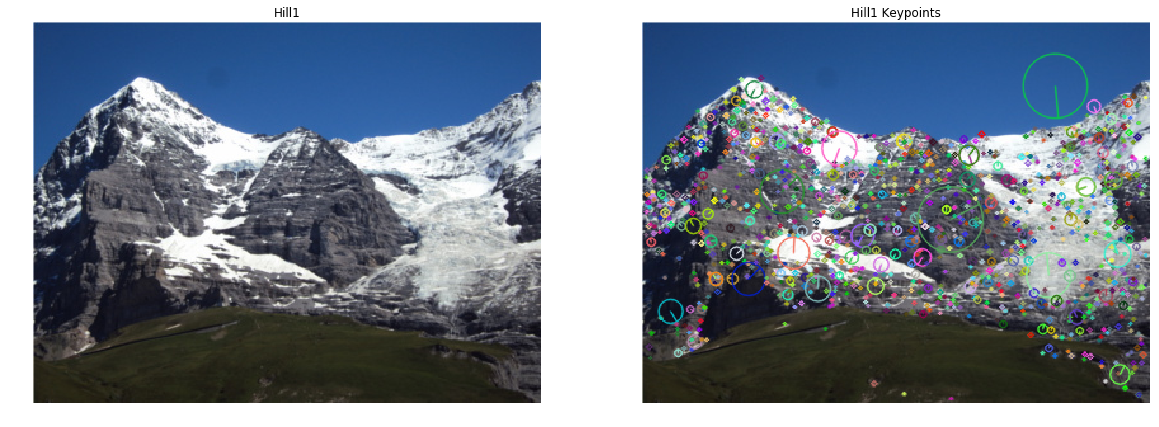

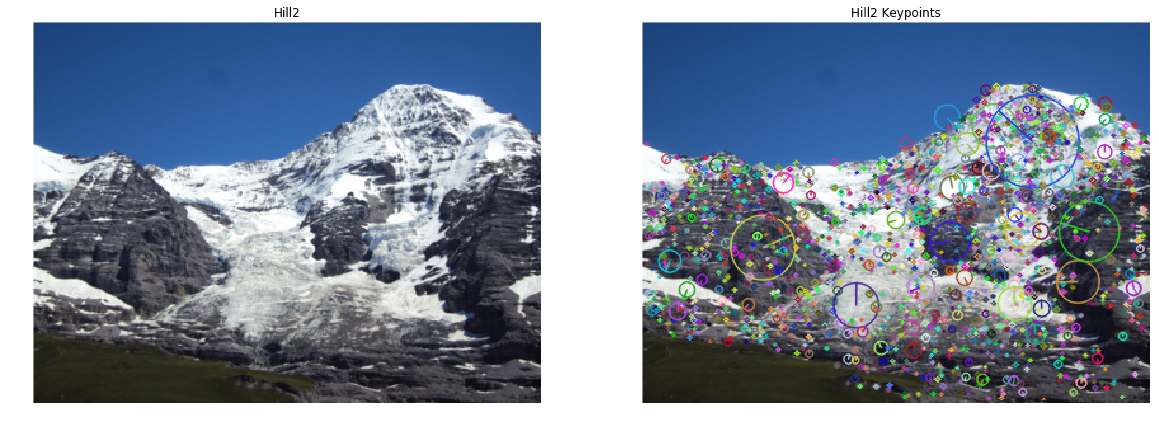

In [6]:
# Draw keypoints
cv2.drawKeypoints(hill1, hill1_kp, hill1_cpy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(hill2, hill2_kp, hill2_cpy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(cv2.cvtColor(hill1, cv2.COLOR_BGR2RGB))
plt.title('Hill1'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(hill1_cpy, cv2.COLOR_BGR2RGB))
plt.title('Hill1 Keypoints'), plt.axis('off')
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(cv2.cvtColor(hill2, cv2.COLOR_BGR2RGB))
plt.title('Hill2'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(hill2_cpy, cv2.COLOR_BGR2RGB))
plt.title('Hill2 Keypoints'), plt.axis('off')
plt.show()

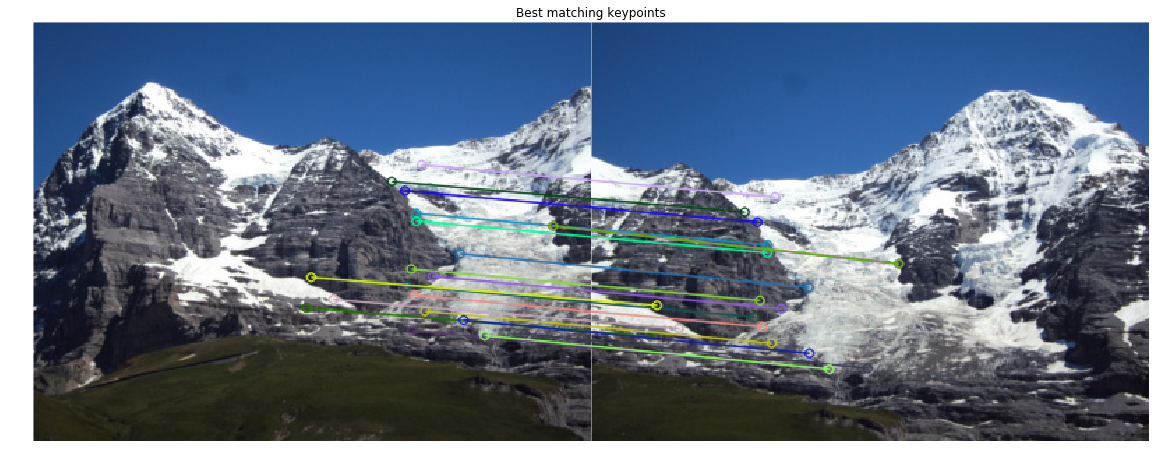

In [9]:
# Find matching keypoints
matches = cv2.BFMatcher().match(hill1_des, hill2_des)
matches.sort(key=lambda x:x.distance)

match_img = cv2.drawMatches(hill1, hill1_kp, hill2, hill2_kp, matches[:20], hill1, flags=2)

# Draw matches
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title('Best matching keypoints'), plt.axis('off')
plt.show()